<h1 align="center"><font size="5">Phone Usage, Study Habits, and Academic Performance: Predicting GPA with Machine Learning</font></h1>


## About the Dataset
The dataset is collected from Albukhary International University. The survey is aims to understand the impact of phone use on eduction and explore challenges and opportunities of  achieving a healthy balance between phone use and productivity learning

| Data | Description |
|-------|------------|
|Age|The age of the individual sudents who filled the form|
|Daily Phone Usage (hours)| The total hours an individual spends on their phone per da|
|Usage During Study (hours)|  The hours students uses their phone specifically while studying |
|Impact on Productivity (1-5)| A rating of how phone usage impacts productivity, where 1 indicates minimal impact and 5 indicates maximum negative impact.|
|Distraction Level (1-5)| A rating of how distracting the phone is, with 1 meaning low distraction and 5 meaning high distraction.|
|Most Used App|The app that the students uses the most, possibly contributing to distraction or phone usage time.|
|GPA| The Grade Point Average of the individual, possibly used to analyze any correlation with phone usage or study habits.|
|Study Hours per Week|The total hours students spends studying per week.|

In [1]:
# Surpress Warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Installing seaborn
!pip install seaborn

## Importing required libraries

In [29]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


## Importing Data Sets

In [30]:
df = pd.read_csv('dilema.csv')
print('Data loaded successfully')

Data loaded successfully


This playing this first 5 rows of the data

In [31]:
df.head()

,Age,Daily_Phone_Usage_hours,Usage_During_Study_hours,Impact_Productivity,Distraction_level,Most_App_Used,GPA,Study_hours_per_week
0,18,4,2,3,3,Instagram,3.5,15
1,21,6,3,2,4,YouTube,2.8,12
2,19,5,2,4,2,whatsApp,3.7,18
3,22,3,1,5,1,Facebook,3.9,20
4,20,7,4,2,5,TikTok,2.5,10


Display the data tyoes of each column

In [32]:
df.dtypes


Age                           int64
Daily_Phone_Usage_hours       int64
Usage_During_Study_hours      int64
Impact_Productivity           int64
Distraction_level             int64
Most_App_Used                object
GPA                         float64
Study_hours_per_week          int64
dtype: object

In [33]:
# Obtaining the statiscal summary of the dataframe
df.describe()

,Age,Daily_Phone_Usage_hours,Usage_During_Study_hours,Impact_Productivity,Distraction_level,GPA,Study_hours_per_week
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,19.943820,4.955056,2.404494,3.213483,3.011236,3.293258,15.224719
std,1.440956,1.429480,1.030436,1.172332,1.426171,0.547473,3.967919
min,18.000000,3.000000,1.000000,2.000000,1.000000,2.400000,9.000000
25%,19.000000,4.000000,2.000000,2.000000,2.000000,2.800000,12.000000
50%,20.000000,5.000000,2.000000,3.000000,3.000000,3.400000,15.000000
75%,21.000000,6.000000,3.000000,4.000000,4.000000,3.800000,18.000000
max,22.000000,7.000000,4.000000,5.000000,5.000000,4.000000,22.000000


## Data wrangling

In [34]:
null_count=df.isnull().sum()
print(null_count)

Age                         0
Daily_Phone_Usage_hours     0
Usage_During_Study_hours    0
Impact_Productivity         0
Distraction_level           0
Most_App_Used               0
GPA                         0
Study_hours_per_week        0
dtype: int64


We can see that we have  no missing values in any of this column, therefore we can proceed to Exploratory Data Analysis (EDA)

## Exploratory Data Analysis

### Data distribution and summary

In [35]:
# Distribution of categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Most_App_Used:
Most_App_Used
Instagram    20
YouTube      18
Facebook     17
TikTok       14
WhatsApp     14
whatsApp      6
Name: count, dtype: int64




<function matplotlib.pyplot.show(close=None, block=None)>

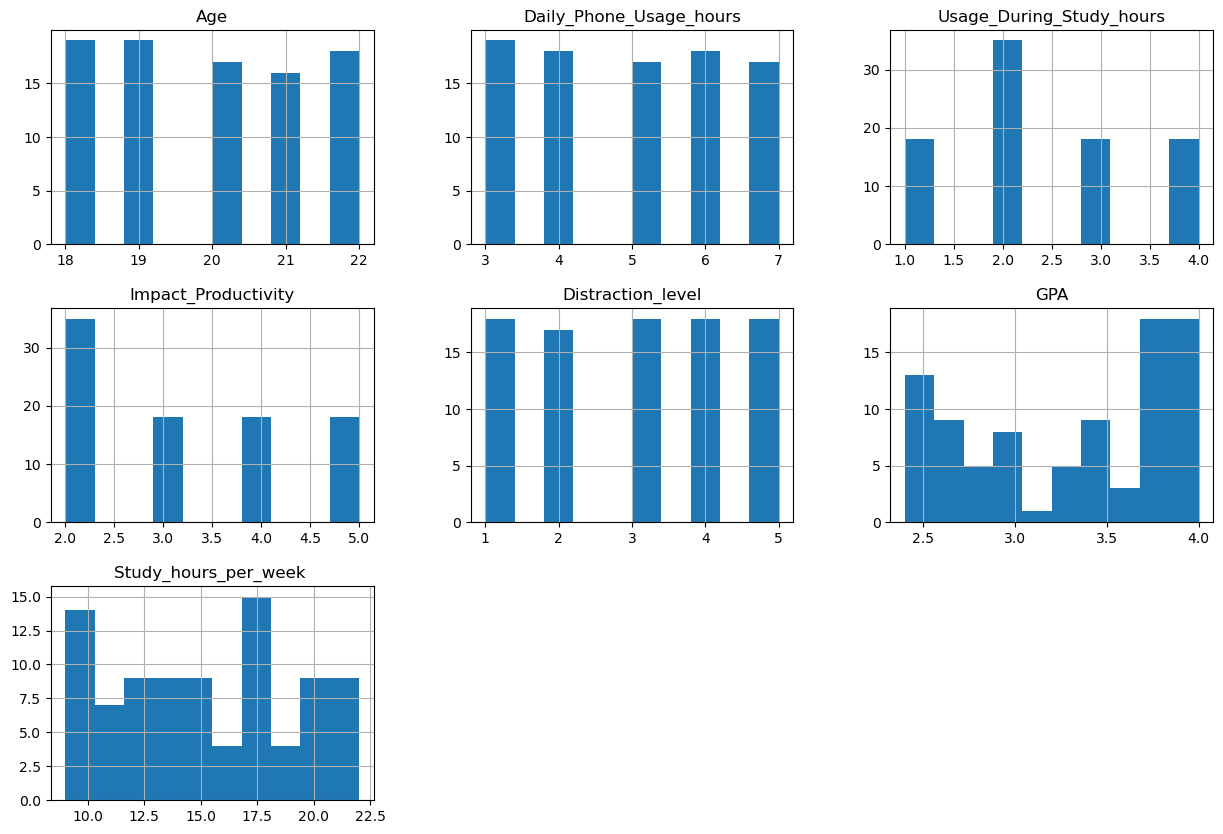

In [36]:
#Histogram for numerical columns
df.hist(bins=10, figsize=(15, 10))
plt.show

### Correlation Analysis
Checking correlations can help identify relationships between numerical featuees and the target variable

In [84]:
df=df.drop(columns=['Most_App_Used'])

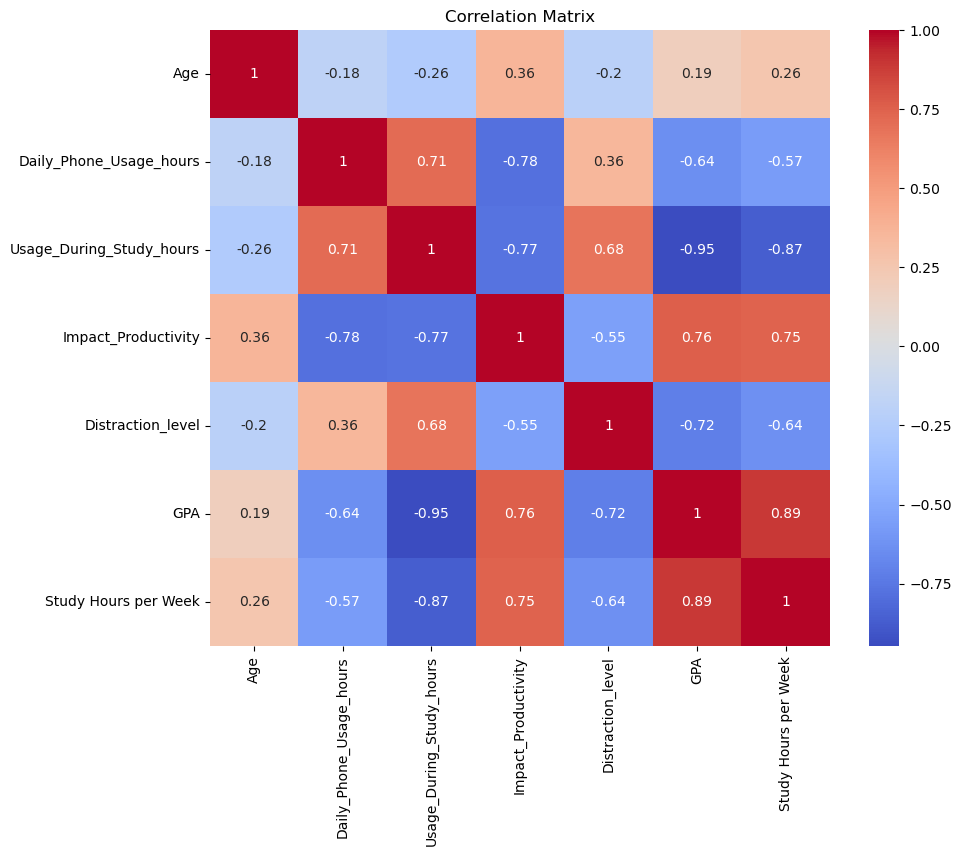

In [85]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Analyzing Relationships Betweem Variables
Using Scatter plots, boxplot and other  visualizations to explore relationships


In [38]:
# Strip any leading/trailing spaces and rename columns
df.columns = df.columns.str.strip()

# Rename 'Study_hours_per_week' and other columns if needed
df.rename(columns={'Study_hours_per_week': 'Study Hours per Week'}, inplace=True)

# Check column names again
print(df.columns)


Index(['Age', 'Daily_Phone_Usage_hours', 'Usage_During_Study_hours',
       'Impact_Productivity', 'Distraction_level', 'Most_App_Used', 'GPA',
       'Study Hours per Week'],
      dtype='object')


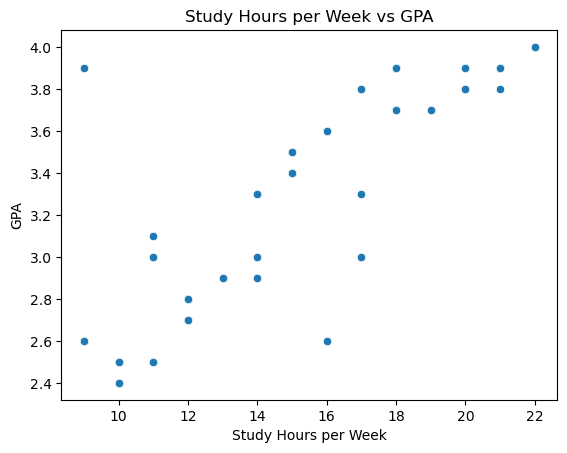

In [39]:
# Scatter plot to see relation between 'Study Hours per Week' and 'GPA'
sns.scatterplot(data=df, x='Study Hours per Week', y='GPA')
plt.title('Study Hours per Week vs GPA')
plt.show()

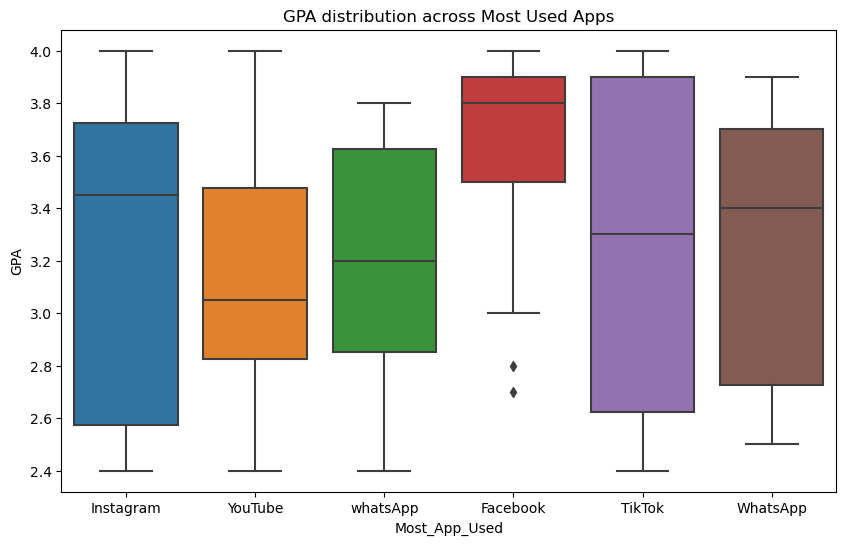

In [40]:
# Box plot for GPA distribution across different Most used Apps
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Most_App_Used', y='GPA')
plt.title('GPA distribution across Most Used Apps')
plt.show()

### Examining Impact and Distraction Levels

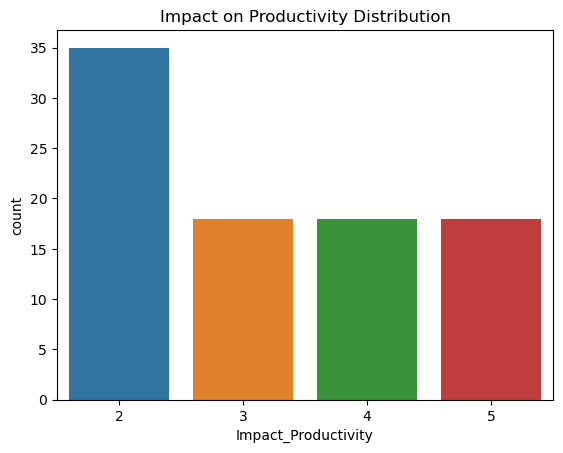

In [41]:
# Count plot for Impact on Productivity
sns.countplot(data=df, x='Impact_Productivity')
plt.title('Impact on Productivity Distribution')
plt.show()

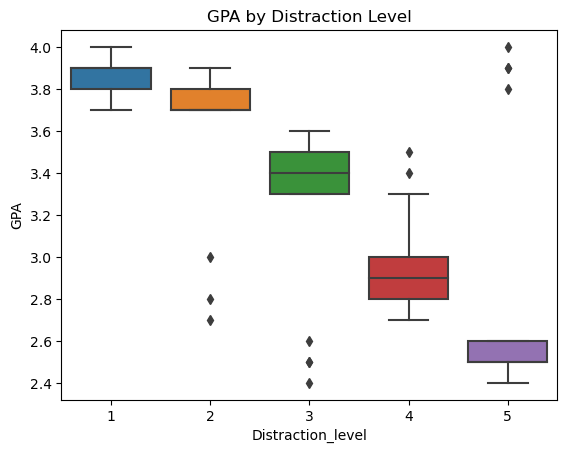

In [42]:
# Distribution of Distraction level and its effect on GPA
sns.boxplot(data=df, x='Distraction_level', y='GPA')
plt.title('GPA by Distraction Level')
plt.show()

### Examine if GPA is impacted by "Daily Phone Usage" or "Using durin Study"

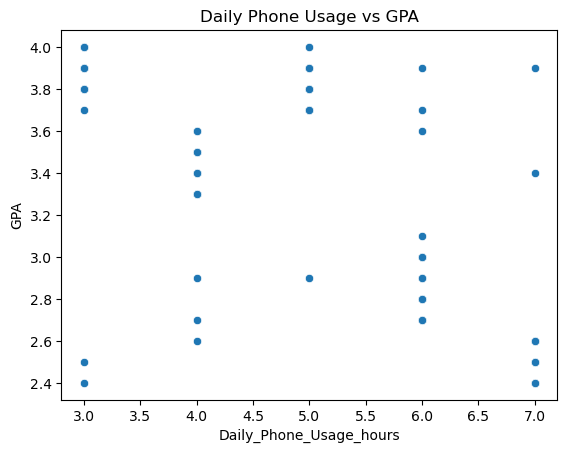

In [43]:
# Scatter plot for daily phone Usage and GPA
sns.scatterplot(data=df, x='Daily_Phone_Usage_hours', y='GPA')
plt.title('Daily Phone Usage vs GPA')
plt.show()

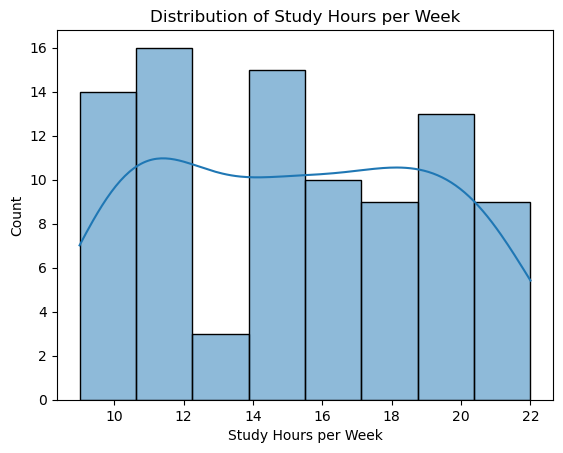

In [44]:
# Distribution of study hours per week
sns.histplot(df['Study Hours per Week'], kde=True )
plt.title('Distribution of Study Hours per Week')
plt.show()

## Model Development

### Define the Features(X) and Target(Y)

In [45]:
# Define feature set X and target variable y with correct column names
X = df[['Age', 'Daily_Phone_Usage_hours', 'Usage_During_Study_hours', 
        'Impact_Productivity', 'Distraction_level', 'Study Hours per Week']]
y = df['GPA']


### Split the Data

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### BuilLinear Regression Model

In [47]:
# Initialise the model
model = LinearRegression()

# Fitthe model to the train data
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions and Evaluate the Model
After training, evaluate the model on the test set

In [63]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse_linear)
print('R-Squared (R2):', r2_linear)

Mean Squared Error (MSE): 0.008395183287814443
R-Squared (R2): 0.9687961525151786


### Random Forest Model

In [64]:
# intialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -MSE: {mse_rf}, R2: {r2_rf}")

Random Forest -MSE: 0.0052581380626991175, R2: 0.9804561577112021


### Support Vector Regression (SVR)

In [66]:
# intialize and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

SVR()

In [67]:
# Predict and evaluate
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {mse_svr}, R2: {r2_svr}")

Support Vector Regression - MSE: 0.01614840747817324, R2: 0.9399783867967405


### Gradient Boosting Regressor

In [68]:
# Intialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [69]:
# Predict and Evaluate 
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting -MSE: {mse_gb}, R2: {r2_gb}")

Gradient Boosting -MSE: 0.005966603889563984, R2: 0.9778228787401775


### Compare Model Performance
A summary table to compare the results of all models

In [72]:
results = {
    'Models': ['Linear Regression', 'Random Forest', 'Support Vector Regression', 'Gradient Boosting'],
    'MSE': [mse_linear, mse_rf, mse_svr, mse_gb],
    'R2' : [r2_linear, r2_rf,r2_svr, r2_gb]
}

performance_df = pd.DataFrame(results)
print(performance_df)

                      Models       MSE        R2
0          Linear Regression  0.008395  0.968796
1              Random Forest  0.005258  0.980456
2  Support Vector Regression  0.016148  0.939978
3          Gradient Boosting  0.005967  0.977823


### Heatmap for Correlation Between Model Metrics

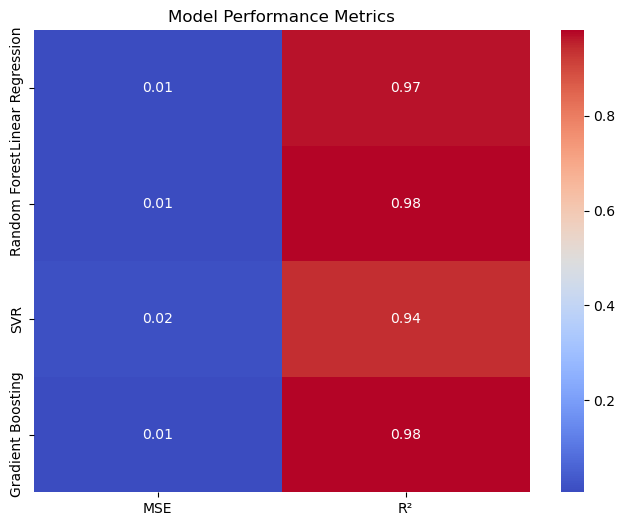

In [81]:
# Ensure metrics are of the same length and properly formatted
mse_values = [mse_linear, mse_rf, mse_svr, mse_gb]  # Replace with your actual values
r2_values = [r2_linear, r2_rf, r2_svr, r2_gb]       # Replace with your actual values

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame({
    "MSE": mse_values,
    "R²": r2_values
}, index=["Linear Regression", "Random Forest", "SVR", "Gradient Boosting"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Model Performance Metrics')
plt.show()

